<a href="https://colab.research.google.com/github/alaminmagaga/fellowship.ai/blob/master/IMDB_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Libraries
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from  sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Download NLTK stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Initialize PorterStemmer
porter_stemmer = PorterStemmer()

In [ ]:
#Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/My Drive/IMDB Dataset.csv')

In [ ]:
#print the first 5 rows
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
#Check for class balance
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

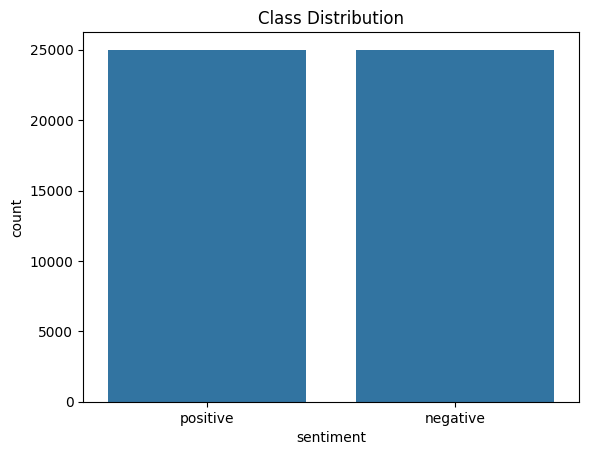

In [ ]:
# Plot class distribution
sns.countplot(x='sentiment', data=df)
plt.title('Class Distribution')
plt.show()

In [ ]:
 # Convert sentiments to binary values
df['sentiment'] = df['sentiment'].replace({'positive': 1, 'negative': 0})

**Text Cleaning**<br>
1-Remove HTML tags<br>
2-Remove special characters<br>
3-Converting everything to lower case<br>
4-Removing stop words<br>
5-Stemming

In [ ]:
# Function for text cleaning
def clean_text(text):
    # Remove HTML tags
    text = re.sub('<.*?>', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Convert to lower case
    text = text.lower()
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    # Stemming
    text = ' '.join([porter_stemmer.stem(word) for word in text.split()])
    return text

In [ ]:
# Apply text cleaning to the 'review' column
df['clean_review'] = df['review'].apply(clean_text)

In [ ]:
# Define feature and target variables
X = df['clean_review']
y = df['sentiment']

In [ ]:
# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Convert text to numerical data
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
#Train the Logistic Regression Model
logreg = LogisticRegression(max_iter=100)
logreg.fit(X_train, y_train)


LogisticRegression()

In [ ]:
logreg_pred = logreg.predict(X_test)

In [ ]:
#Evaluation of the Logistic Regression model
print(f'Score: {logreg.score(X_test, y_test)}')
print(f'Accuracy score: {accuracy_score(y_test, logreg_pred)}')
print(f'Precision score: {precision_score(y_test, logreg_pred)}')
print(f'Recall score: {recall_score(y_test, logreg_pred)}')

Score: 0.8864
Accuracy score: 0.8864
Precision score: 0.8756496631376324
Recall score: 0.902758483826156


In [ ]:
print('Classification Report:')
print(classification_report(y_test, logreg_pred))
print()

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000




In [ ]:
##Train the Random Forest Model
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [ ]:
y_pred = rfc.predict(X_test)

In [ ]:
#Evaluation of the Random Forest model
print(f'Score: {rfc.score(X_test, y_test)}')
print(f'Accuracy score: {accuracy_score(y_test, rfc_pred)}')
print(f'Precision score: {precision_score(y_test, rfc_pred)}')
print(f'Recall score: {recall_score(y_test, rfc_pred)}')

Score: 0.8475
Accuracy score: 0.8475
Precision score: 0.858278955954323
Recall score: 0.8352847787259376


In [ ]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      4961
           1       0.86      0.84      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [ ]:
#Train the XGBoost Model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
xgb_pred = xgb.predict(X_test)

In [ ]:
#Evaluation of the XGBoost Model model
print(f'Score: {xgb.score(X_test, y_test)}')
print(f'Accuracy score: {accuracy_score(y_test, xgb_pred)}')
print(f'Precision score: {precision_score(y_test, xgb_pred)}')
print(f'Recall score: {recall_score(y_test, xgb_pred)}')

Score: 0.8588
Accuracy score: 0.8588
Precision score: 0.8473472514843899
Recall score: 0.8779519745981346


In [ ]:
print('Classification Report:')
print(classification_report(y_test, xgb_pred))
print()

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      4961
           1       0.85      0.88      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000




In [ ]:
# Save the Logistic Regression model
import pickle

pkl_model=open('IMDB.pkl','wb')
pickle.dump(logreg,pkl_model)